# Gradient Boosting Regression

In [17]:
# Gradient Boosting Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data/Regression/Company_Performance.csv')
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gb_r = GradientBoostingRegressor(n_estimators = 500, max_depth = 6, learning_rate = 0.01)
gb_r.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
gb_r.score(X_train, y_train)

0.9999568287525894

In [23]:
gb_r.score(X_test, y_test)

0.862517348713784

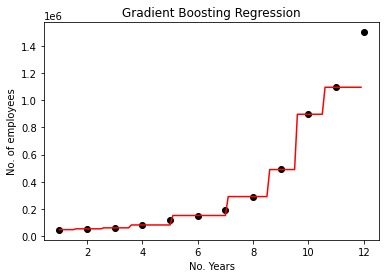

In [24]:
# Visualising the Random Forest Regression results (higher resolution)
#Graph 
X_dt = np.arange(min(X), max(X), 0.1)
X_dt = X_dt.reshape(len(X_dt), 1)
plt.scatter(X, y, color = 'black')
plt.plot(X_dt, gb_r.predict(X_dt), color = 'red' )
plt.title('Gradient Boosting Regression')
plt.ylabel('No. of employees')
plt.xlabel('No. Years')
plt.show()

# Gradient Boosting Classification

In [32]:
#Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('Data/Classification/BankNote_Authentication.csv')

X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import GradientBoostingClassifier
gb_c = GradientBoostingClassifier(n_estimators = 200, random_state = 0)
gb_c.fit(X_train, y_train)

# Predicting the Test set results
from sklearn.metrics import accuracy_score
y_pred = gb_c.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(test_acc)

0.9416909620991254


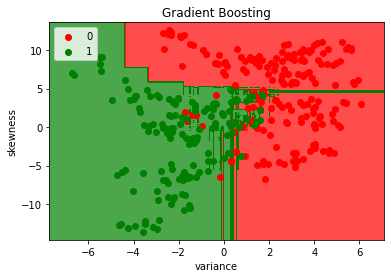

In [33]:
from matplotlib.colors import ListedColormap
import numpy as np
#Define Variables
clf = gb_c
h = 0.01
X_plot, z_plot = X_test, y_test

#Standard Template to draw graph
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh
Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,
             alpha = 0.7, cmap = ListedColormap(('red', 'green')))


for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(X_plot[z_plot == j, 0], X_plot[z_plot == j, 1],
                c = ['red', 'green'][i], cmap = ListedColormap(('red', 'green')), label = j)
   #X[:, 0], X[:, 1] 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Gradient Boosting')
plt.xlabel('variance')
plt.ylabel('skewness')
plt.legend()

plt.show()

# Advanced
https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_early_stopping.html